/home/msi/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



0: 416x640 1 NIK, 1 Nama, 1 Text, 1 Foto, 180.1ms
Speed: 4.2ms preprocess, 180.1ms inference, 98.1ms postprocess per image at shape (1, 3, 416, 640)


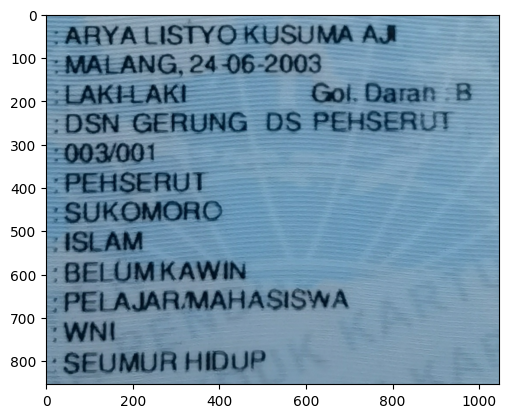

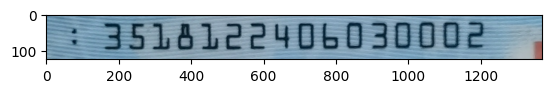

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from ultralytics import YOLO

model = YOLO('runs/detect/train4/weights/best.pt')

image = cv2.imread('dataset/test/images/4.jpg')
results = model.predict(image, conf=0.2)
result = results[0]
for box in result.boxes:
    x1, y1, x2, y2 = [
        round(x) for x in box.xyxy[0].tolist()
    ]
    class_id = box.cls[0].item()
    if (class_id == 0):
        # roi = image[(y1-30):y2, (x1-20):(x2-650)]
        roi_nik = image[y1:y2, x1-200:x2+200]
        # roi = cv2.resize(roi, (roi.shape[1]*2, roi.shape[0]*2))
        plt.imshow(cv2.cvtColor(roi_nik, cv2.COLOR_BGR2RGB))
        plt.show()
    if (class_id == 2):
        # roi = image[(y1-30):y2, (x1-20):(x2-650)]
        roi_data = image[y1:y2, x1:x2]
        # roi = cv2.resize(roi, (roi.shape[1]*2, roi.shape[0]*2))
        plt.imshow(cv2.cvtColor(roi_data, cv2.COLOR_BGR2RGB))
        plt.show()

    


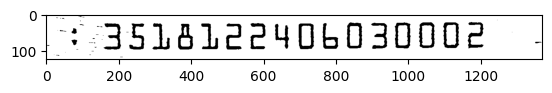

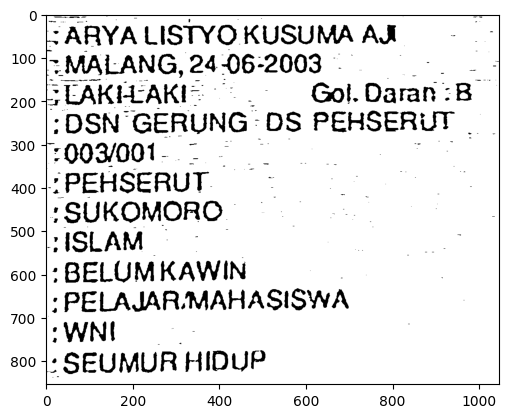

3518122406030002
ARYA LISTYO KUSUMA AJ
MALANG, 24.06-2003
EAKIAKI
Gol. Daran :B
:DSN GERUNG
DS PEHSERUT
003001
;PEHSERUT
: SUKOMORO
' ISLAM
;BELUMKAWIN
PELAJARMAHASISWA
; WNI
:SEUMUR HIDUP


In [2]:
import easyocr 
reader = easyocr.Reader(['id'], gpu=True)
gray_nik = cv2.cvtColor(roi_nik, cv2.COLOR_BGR2GRAY)
gray_data = cv2.cvtColor(roi_data, cv2.COLOR_BGR2GRAY)
blur_nik = cv2.GaussianBlur(gray_nik, (5,5), 0)
blur_data = cv2.GaussianBlur(gray_data, (5,5), 0)
contrast_nik = cv2.addWeighted(blur_nik, 1.5, np.zeros(blur_nik.shape, blur_nik.dtype), 0, 0)
contrast_data = cv2.addWeighted(blur_data, 1.5, np.zeros(blur_data.shape, blur_data.dtype), 0, 0)
adaptive_nik = cv2.adaptiveThreshold(contrast_nik, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 41, 25)
adaptive_data = cv2.adaptiveThreshold(contrast_data, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 41, 20)

plt.imshow(adaptive_nik, cmap='gray')
plt.show()
plt.imshow(adaptive_data, cmap='gray')
plt.show()
text_nik = reader.readtext(adaptive_nik, allowlist='0123456789')
text_data = reader.readtext(adaptive_data)
for i in text_nik:
    print(i[1])
for i in text_data:
    print(i[1])

In [10]:
def correct(text):
    unwanted_chars = [ '!', '?', ':', ';', '(', ')', '[', ']', '{', '}', '\'', '\"', '/', '\\', '*', '&', '^', '%', '$', '#', '@', '~', '`', '+', '=', '|', '<', '>']
    for char in unwanted_chars:
        text = text.replace(char, '')
    text = text.strip()
    # see if text are "000000" numbers
    if text.isdigit()and len(text) == 6:
        text = text[:3] + '/' + text[3:]
    # text = text.lower()
    return text
for i in text_nik:
    print(correct(i[1]))
for i in text_data:
    print(correct(i[1]))

3518122406030002
ARYA LISTYO KUSUMA AJ
MALANG, 24.06-2003
EAKIAKI
Gol. Daran B
DSN GERUNG
DS PEHSERUT
003/001
PEHSERUT
SUKOMORO
ISLAM
BELUMKAWIN
PELAJARMAHASISWA
WNI
SEUMUR HIDUP
